In [10]:
import sys
import sklearn
import numpy as np
print(f"sklearn version : {sklearn.__version__}")
print(f"sys version : {sys.version}")
print(f"numpy version : {np.__version__}")
!python --version

sklearn version : 1.2.2
sys version : 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
numpy version : 1.24.3
Python 3.11.3


In [11]:
from sklearn.datasets import load_diabetes

In [12]:
X, y = load_diabetes(return_X_y = True)
print(X.shape, y.shape)

(442, 10) (442,)


In [13]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [14]:
y = np.concatenate([y.reshape(-1, 1), X[:,3].reshape(-1, 1)], axis=1)
X = np.delete(X, [3], axis=1)
print(X.shape, y.shape)

(442, 9) (442, 2)


In [15]:
import seaborn as sns

<Axes: >

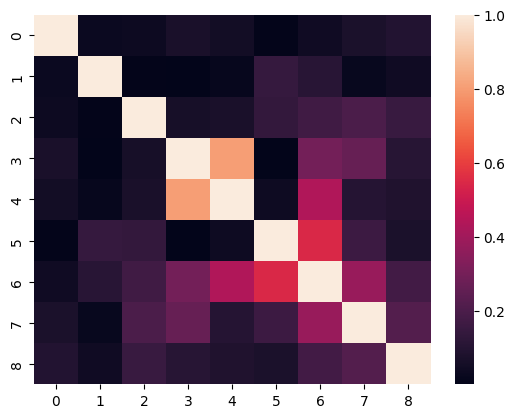

In [16]:
sns.heatmap(np.corrcoef(X, rowvar=False)**2)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)   

(331, 9) (111, 9) (331, 2) (111, 2)


In [21]:
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
n = 2

pls_list = [(PLSCanonical(n_components = n), 'PLSCanonical'),
            (PLSRegression(n_components = n), 'PLSRegression'),
            (CCA(n_components = n), 'CCA')] # CCA : Canonical Correlation Analysis

In [24]:
from sklearn import metrics

for model, name in pls_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_pred, y_pred)
    
    print(name)
    print(f"mse : {mse}")
    print(f"r2 : {r2}")
    print("-"*50)
    print('\n')

PLSCanonical
mse : 3467.516669552312
r2 : 1.0
--------------------------------------------------


PLSRegression
mse : 1737.4225354185007
r2 : 1.0
--------------------------------------------------


CCA
mse : 1929.1991587243863
r2 : 1.0
--------------------------------------------------




In [25]:
model

CCA()

In [26]:
model.transform(X_train)

array([[-4.99061583e-01, -1.07237901e+00],
       [-7.34570593e-03,  7.10299975e-01],
       [ 5.67819146e-02,  2.07698893e-01],
       [ 1.38669476e+00,  7.38162453e-01],
       [ 1.32955949e+00,  2.01599356e-01],
       [ 6.23758862e-01, -1.15088929e-01],
       [-4.96766223e-01,  1.08695606e-01],
       [ 1.42787069e+00,  2.99907556e-01],
       [ 1.16669625e+00, -4.12960433e-01],
       [-8.20869038e-01,  5.27514567e-01],
       [ 9.19999893e-01,  1.56665372e-01],
       [ 7.66299886e-01, -2.57922799e-01],
       [ 5.95120759e-01, -8.55394017e-01],
       [ 4.07227873e-01, -3.30924603e-01],
       [ 4.76230154e-01,  5.60310920e-01],
       [-3.39687774e-01, -5.33638805e-01],
       [-6.27367844e-02, -3.36086848e-01],
       [ 7.91344461e-01,  8.01581815e-01],
       [ 3.49975395e-01, -7.80091174e-02],
       [-1.03468626e+00, -7.95668699e-01],
       [-1.44617159e-01,  5.55146956e-01],
       [ 2.76206210e-01, -2.47704599e-01],
       [ 4.63908834e-01,  3.37837713e-01],
       [-5.

In [27]:
X_train.shape

(331, 9)

In [28]:
model.transform(X_train).round(2)

array([[-0.5 , -1.07],
       [-0.01,  0.71],
       [ 0.06,  0.21],
       [ 1.39,  0.74],
       [ 1.33,  0.2 ],
       [ 0.62, -0.12],
       [-0.5 ,  0.11],
       [ 1.43,  0.3 ],
       [ 1.17, -0.41],
       [-0.82,  0.53],
       [ 0.92,  0.16],
       [ 0.77, -0.26],
       [ 0.6 , -0.86],
       [ 0.41, -0.33],
       [ 0.48,  0.56],
       [-0.34, -0.53],
       [-0.06, -0.34],
       [ 0.79,  0.8 ],
       [ 0.35, -0.08],
       [-1.03, -0.8 ],
       [-0.14,  0.56],
       [ 0.28, -0.25],
       [ 0.46,  0.34],
       [-0.57, -0.6 ],
       [ 0.72,  0.72],
       [-0.66, -0.27],
       [ 0.51,  0.45],
       [ 0.68, -0.26],
       [ 1.06,  0.36],
       [-1.32, -0.74],
       [-0.77,  0.57],
       [-1.29, -0.32],
       [-1.  ,  0.47],
       [ 0.63,  0.13],
       [-1.08,  0.24],
       [ 0.04, -0.29],
       [-1.05, -0.7 ],
       [-0.5 , -0.07],
       [ 1.75, -0.08],
       [ 0.36,  0.38],
       [ 1.15, -0.1 ],
       [ 0.18, -0.39],
       [-0.66,  0.96],
       [ 0.